In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('Nashville_housing_data.csv')
df.head(5)

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [3]:
df.dtypes

Unnamed: 0                             int64
Parcel ID                             object
Land Use                              object
Property Address                      object
Suite/ Condo   #                     float64
Property City                         object
Sale Date                             object
Legal Reference                       object
Sold As Vacant                        object
Multiple Parcels Involved in Sale     object
City                                  object
State                                 object
Acreage                              float64
Tax District                          object
Neighborhood                           int64
Land Value                             int64
Building Value                         int64
Finished Area                        float64
Foundation Type                       object
Year Built                             int64
Exterior Wall                         object
Grade                                 object
Bedrooms  

In [4]:
# Renaming the columns:

# Create a dictionary to store the old and new column names
column_mapping = {
    'Unnamed: 0': 'Unnamed_0',
    'Parcel ID': 'Parcel_ID',
    'Land Use': 'Land_Use',
    'Property Address': 'Property_Address',
    'Suite/ Condo   #': 'Suite_Condo_#',
    'Property City': 'Property_City',
    'Sale Date': 'Sale_Date',
    'Legal Reference': 'Legal_Reference',
    'Sold As Vacant': 'Sold_As_Vacant',
    'Multiple Parcels Involved in Sale': 'Multiple_Parcels_Involved_in_Sale',
    'Tax District': 'Tax_District',
    'Land Value': 'Land_Value',
    'Building Value': 'Building_Value',
    'Finished Area': 'Finished_Area',
    'Foundation Type': 'Foundation_Type',
    'Year Built': 'Year_Built',
    'Exterior Wall': 'Exterior_Wall',
    'Full Bath': 'Full_Bath',
    'Half Bath': 'Half_Bath',
    'Sale Price Compared To Value': 'Sale_Price_Compared_To_Value'
}
df.rename(columns=column_mapping, inplace=True)        # Rename the columns using the mapping
print(df.columns)                                      # Print the updated column names

Index(['Unnamed_0', 'Parcel_ID', 'Land_Use', 'Property_Address',
       'Suite_Condo_#', 'Property_City', 'Sale_Date', 'Legal_Reference',
       'Sold_As_Vacant', 'Multiple_Parcels_Involved_in_Sale', 'City', 'State',
       'Acreage', 'Tax_District', 'Neighborhood', 'Land_Value',
       'Building_Value', 'Finished_Area', 'Foundation_Type', 'Year_Built',
       'Exterior_Wall', 'Grade', 'Bedrooms', 'Full_Bath', 'Half_Bath',
       'Sale_Price_Compared_To_Value'],
      dtype='object')


In [5]:
df.isnull().sum()

Unnamed_0                                0
Parcel_ID                                0
Land_Use                                 0
Property_Address                         2
Suite_Condo_#                        22651
Property_City                            2
Sale_Date                                0
Legal_Reference                          0
Sold_As_Vacant                           0
Multiple_Parcels_Involved_in_Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax_District                             0
Neighborhood                             0
Land_Value                               0
Building_Value                           0
Finished_Area                            1
Foundation_Type                          1
Year_Built                               0
Exterior_Wall                            0
Grade                                    0
Bedrooms                                 3
Full_Bath  

In [6]:
# Dropping the column "Suite_Condo_#" as all of the 100% data is unavailable:
df = df.drop(columns=['Suite_Condo_#'], axis=1)

# Since less than 1% of data has null values, dropping them won't affect out Data Quality:
df=df.dropna()

# Dropping Columns Irrelevant to the study:
df = df.drop(columns=['Unnamed_0','Parcel_ID','Legal_Reference','Property_City'], axis=1)

In [7]:
df["Land_Use"].value_counts()

SINGLE FAMILY             21282
DUPLEX                     1184
RESIDENTIAL COMBO/MISC       36
QUADPLEX                     34
Name: Land_Use, dtype: int64

In [8]:
# As Duplex and Quadplex comes under Residential Properties we group them under residential combo
df['Land_Use']=np.where(df['Land_Use'] =='DUPLEX', 'RESIDENTIAL COMBO/MISC', df['Land_Use'])
df['Land_Use']=np.where(df['Land_Use'] =='QUADPLEX', 'RESIDENTIAL COMBO/MISC', df['Land_Use'])
df["Land_Use"].value_counts()

SINGLE FAMILY             21282
RESIDENTIAL COMBO/MISC     1254
Name: Land_Use, dtype: int64

In [9]:
df["Sold_As_Vacant"].value_counts()

No     22402
Yes      134
Name: Sold_As_Vacant, dtype: int64

In [10]:
df["Multiple_Parcels_Involved_in_Sale"].value_counts()

No     22069
Yes      467
Name: Multiple_Parcels_Involved_in_Sale, dtype: int64

In [11]:
df["City"].value_counts()

NASHVILLE         17926
MADISON            1145
ANTIOCH            1133
HERMITAGE           913
OLD HICKORY         797
GOODLETTSVILLE      435
BRENTWOOD           157
WHITES CREEK         13
JOELTON              11
MOUNT JULIET          6
Name: City, dtype: int64

In [12]:
df["State"].value_counts()

TN    22536
Name: State, dtype: int64

In [13]:
df["Tax_District"].value_counts()

URBAN SERVICES DISTRICT      17411
GENERAL SERVICES DISTRICT     3853
CITY OF OAK HILL               348
CITY OF FOREST HILLS           345
CITY OF GOODLETTSVILLE         344
CITY OF BELLE MEADE            214
CITY OF BERRY HILL              21
Name: Tax_District, dtype: int64

In [14]:
df["Foundation_Type"].value_counts()

CRAWL        14148
FULL BSMT     3802
PT BSMT       3121
SLAB          1427
PIERS           36
TYPICAL          2
Name: Foundation_Type, dtype: int64

In [15]:
# PIERS and TYPICAL Foundation Type comes under CRAWL Foundation Type
df['Foundation_Type']=np.where(df['Foundation_Type'] =='PIERS', 'CRAWL', df['Foundation_Type'])
df['Foundation_Type']=np.where(df['Foundation_Type'] =='TYPICAL', 'CRAWL', df['Foundation_Type'])
df["Foundation_Type"].value_counts()

CRAWL        14186
FULL BSMT     3802
PT BSMT       3121
SLAB          1427
Name: Foundation_Type, dtype: int64

In [16]:
df["Exterior_Wall"].value_counts()

BRICK          11512
FRAME           8098
BRICK/FRAME     2217
STONE            328
STUCCO           156
FRAME/STONE      104
CONC BLK          99
LOG               15
METAL              7
Name: Exterior_Wall, dtype: int64

In [17]:
df["Grade"].value_counts()

C       16162
B        3375
D        1911
A         547
X         482
E          57
SSC         1
OFB         1
Name: Grade, dtype: int64

In [18]:
# SSC and OFB Grades comes under lowest 'E' grade:
df['Grade']=np.where(df['Grade'] =='SSC', 'E', df['Grade'])
df['Grade']=np.where(df['Grade'] =='OFB', 'E', df['Grade'])
df["Grade"].value_counts()

C       16162
B        3375
D        1911
A         547
X         482
E          57
SSC         1
OFB         1
Name: Grade, dtype: int64

In [19]:
df["Bedrooms"].value_counts()

3.0     12192
4.0      4621
2.0      4572
5.0       819
6.0       194
1.0        79
7.0        29
8.0        21
0.0         4
10.0        2
9.0         2
11.0        1
Name: Bedrooms, dtype: int64

In [20]:
df["Sale_Price_Compared_To_Value"].value_counts()

Over     16979
Under     5557
Name: Sale_Price_Compared_To_Value, dtype: int64

In [21]:
# As the Data is from a single state TN, We can drop the column and columns irrelevant to the study
df = df.drop(columns=['State','Property_Address','Sale_Date','Year_Built'], axis=1)

In [22]:
df.dtypes

Land_Use                              object
Sold_As_Vacant                        object
Multiple_Parcels_Involved_in_Sale     object
City                                  object
Acreage                              float64
Tax_District                          object
Neighborhood                           int64
Land_Value                             int64
Building_Value                         int64
Finished_Area                        float64
Foundation_Type                       object
Exterior_Wall                         object
Grade                                 object
Bedrooms                             float64
Full_Bath                            float64
Half_Bath                            float64
Sale_Price_Compared_To_Value          object
dtype: object

array([[<AxesSubplot:title={'center':'Acreage'}>,
        <AxesSubplot:title={'center':'Neighborhood'}>,
        <AxesSubplot:title={'center':'Land_Value'}>],
       [<AxesSubplot:title={'center':'Building_Value'}>,
        <AxesSubplot:title={'center':'Finished_Area'}>,
        <AxesSubplot:title={'center':'Bedrooms'}>],
       [<AxesSubplot:title={'center':'Full_Bath'}>,
        <AxesSubplot:title={'center':'Half_Bath'}>, <AxesSubplot:>]],
      dtype=object)

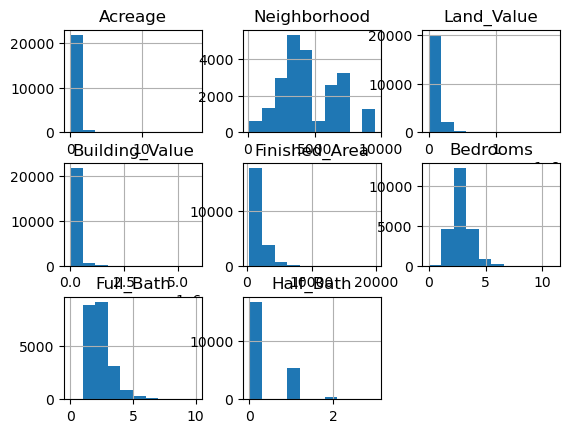

In [23]:
df.hist()

<AxesSubplot:xlabel='Sale_Price_Compared_To_Value', ylabel='count'>

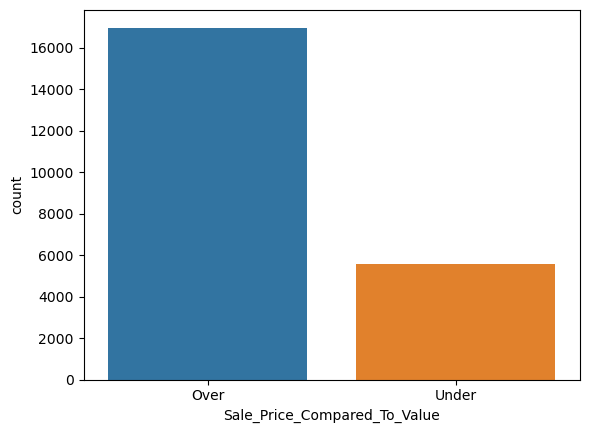

In [24]:
sns.countplot(x='Sale_Price_Compared_To_Value', data=df)

IndexError: index 8 is out of bounds for axis 0 with size 8

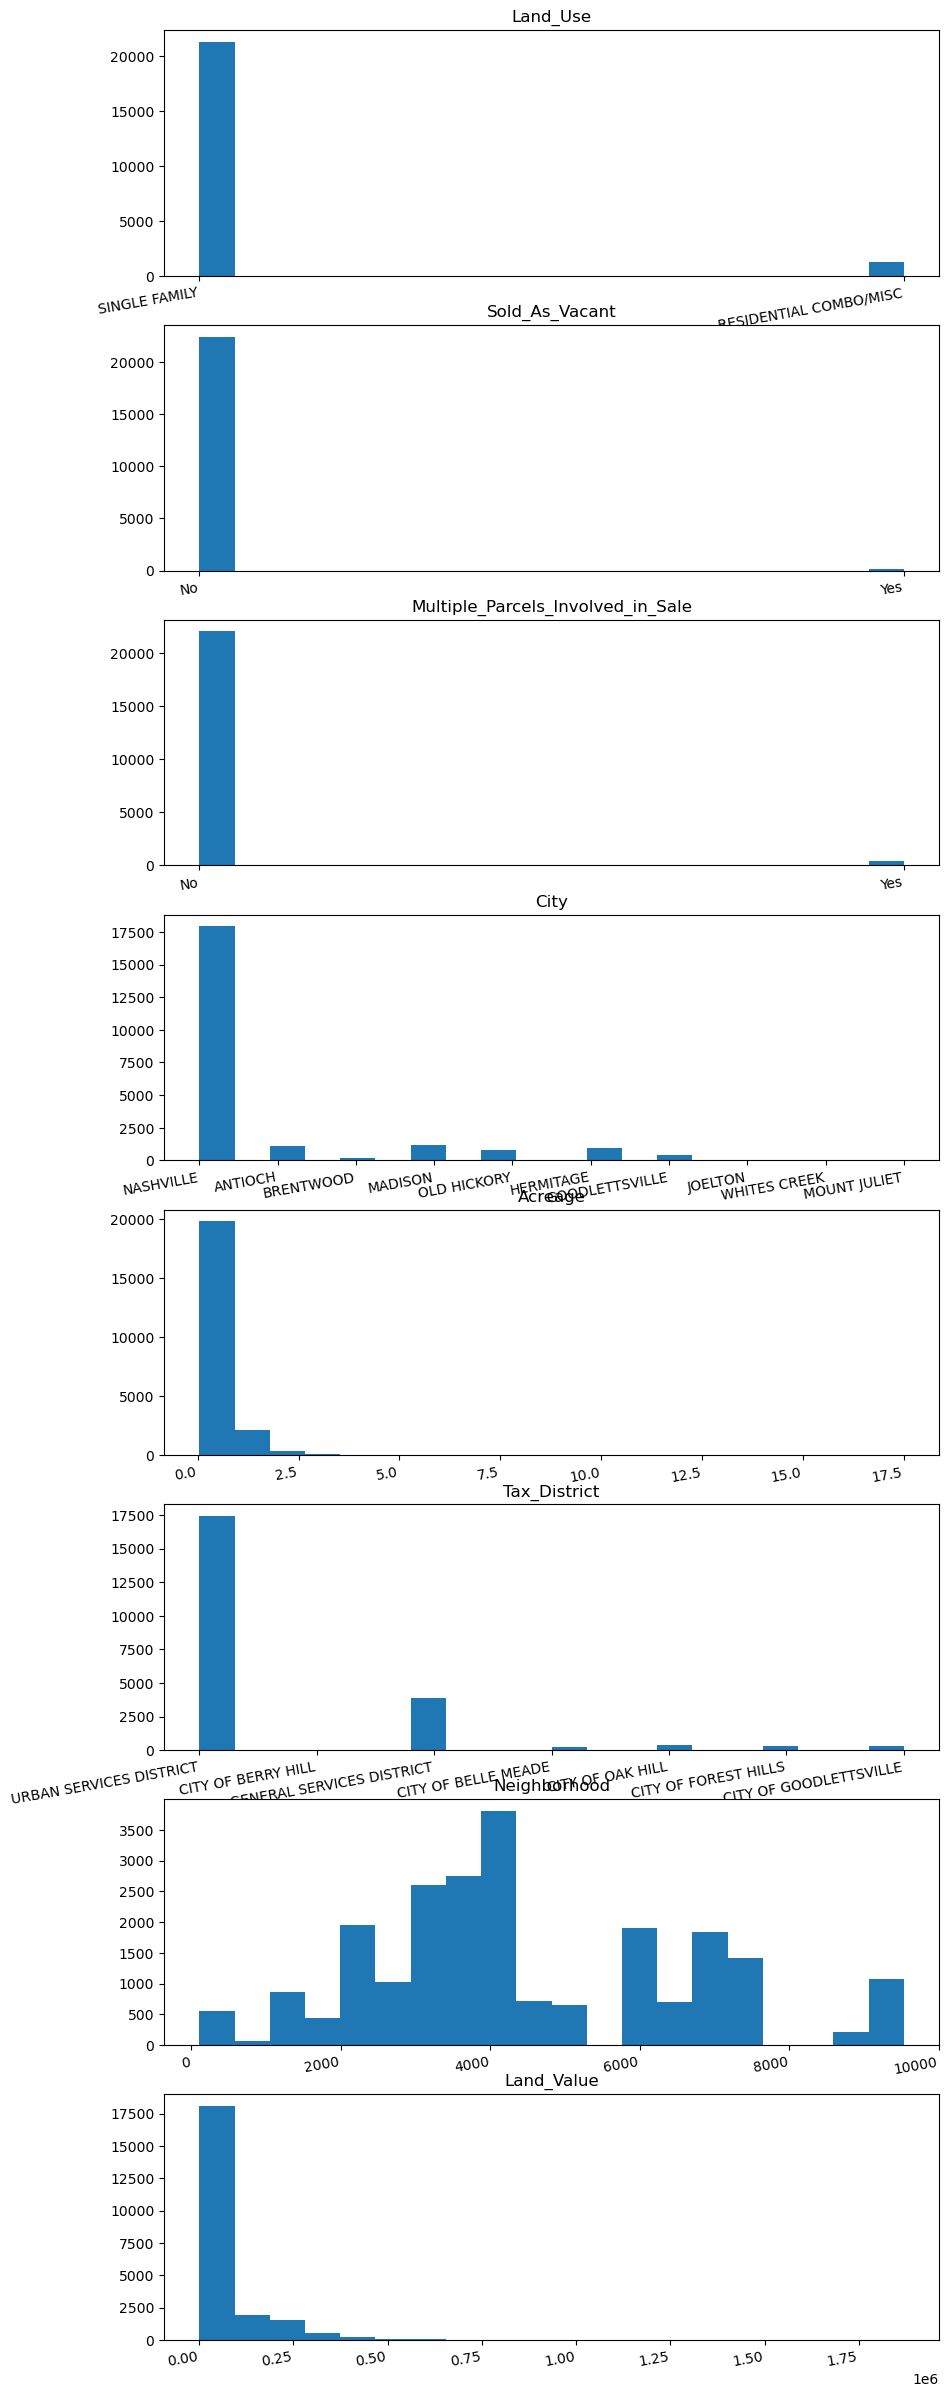

In [25]:
# Create subplots with 8 histograms:

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 30))
# Generate histograms for each column and adjust spacing
for i, col in enumerate(df.columns):
    ax = axes[i]
    ax.hist(df[col], bins=20)
    ax.set_title(col)
    # Rotate x-axis labels by 50 degrees
    plt.setp(ax.get_xticklabels(), rotation=10, ha='right')
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x18e89954520>,
 'caps': [<matplotlib.lines.Line2D at 0x18e89954af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18e89954250>],
 'medians': [<matplotlib.lines.Line2D at 0x18e8995d0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18e8995d3a0>],
 'means': []}

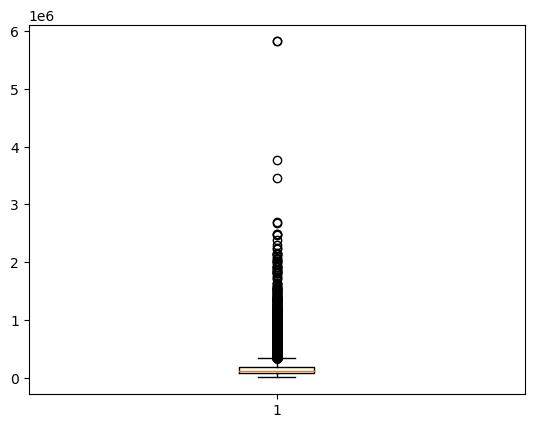

In [26]:
plt.boxplot(df['Building_Value'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18e88cfb460>,
 'caps': [<matplotlib.lines.Line2D at 0x18e88cfba00>,
 'boxes': [<matplotlib.lines.Line2D at 0x18e88cfb2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x18e88cfbfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18e88d052b0>],
 'means': []}

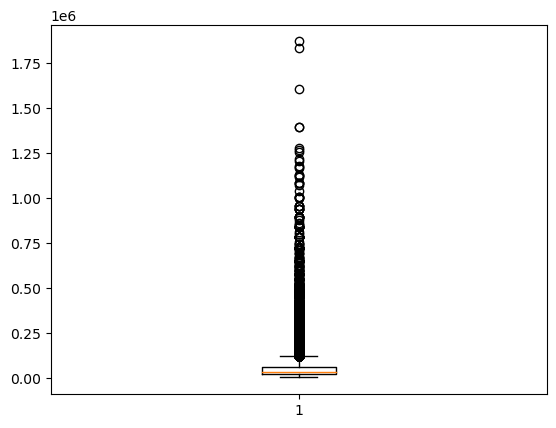

In [27]:
plt.boxplot(df['Land_Value'])

In [28]:
# Creating Dummy Variables for our Dependent Variable:
df = pd.get_dummies(df, columns=['Sale_Price_Compared_To_Value'],drop_first=True, dummy_na=False)

<AxesSubplot:>

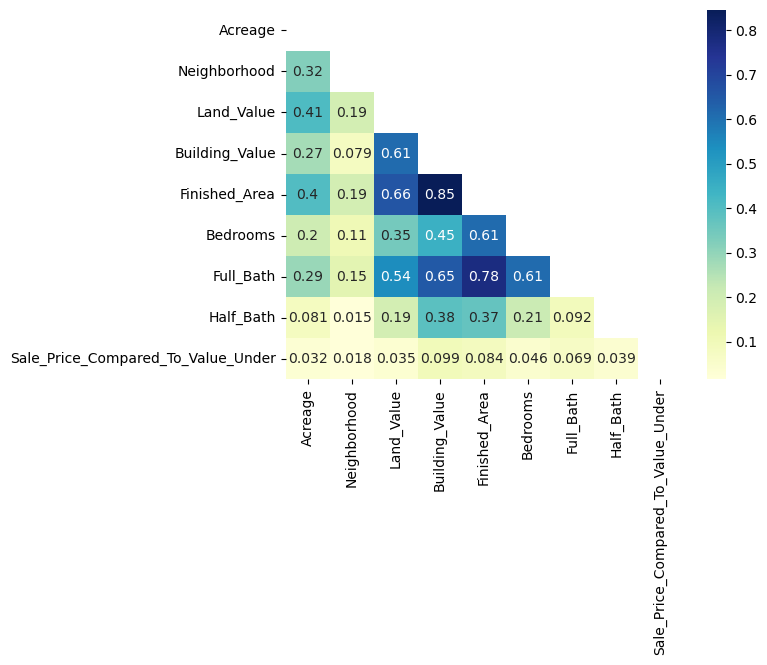

In [29]:
# Correlation Plot:
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True, mask=mask)

In [30]:
# One-Hot-Encoding:
df1 = pd.get_dummies(df, columns=['Land_Use','Sold_As_Vacant', 'Multiple_Parcels_Involved_in_Sale', 'City', 
                                  'Tax_District', 'Foundation_Type', 'Exterior_Wall','Grade'], drop_first=True, dummy_na=False)

In [31]:
# Checking for data duplication:
duplicates = df1.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 1455


In [32]:
df1.drop_duplicates()

,Acreage,Neighborhood,Land_Value,Building_Value,Finished_Area,Bedrooms,Full_Bath,Half_Bath,Sale_Price_Compared_To_Value_Under,Land_Use_SINGLE FAMILY,...,Exterior_Wall_METAL,Exterior_Wall_STONE,Exterior_Wall_STUCCO,Grade_B,Grade_C,Grade_D,Grade_E,Grade_OFB,Grade_SSC,Grade_X
0,0.17,3127,32000,134400,1149.00000,2.0,1.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.11,9126,34000,157800,2090.82495,3.0,2.0,1.0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.17,3130,25000,243700,2145.60001,4.0,2.0,0.0,1,1,...,0,0,0,1,0,0,0,0,0,0
3,0.34,3130,25000,138100,1969.00000,2.0,1.0,0.0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,0.17,3130,25000,86100,1037.00000,2.0,1.0,0.0,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22645,0.24,6328,22000,74500,1311.00000,3.0,2.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
22646,0.38,6328,25000,105000,1758.00000,3.0,2.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
22647,0.27,6328,25000,142400,2421.00000,3.0,3.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
22648,0.23,6328,25000,159300,3117.00000,3.0,3.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [33]:
# Check if the rank is equal to the number of columns
rank = np.linalg.matrix_rank(df1.values)
if rank < df1.shape[1]:
    print("The dataframe has linearly dependent rows.")
else:
    print("The dataframe does not have linearly dependent rows.")

The dataframe does not have linearly dependent rows.


In [34]:
# Model 1: Logistic Regression Model:

from statsmodels.stats.outliers_influence import variance_inflation_factor
y_logr=df1[['Sale_Price_Compared_To_Value_Under']]
x_logr=df1.drop(['Sale_Price_Compared_To_Value_Under'],axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, z_train, z_test = train_test_split(x_logr, y_logr, test_size=0.40)

Xlog2 = sm.add_constant(x_train) 
logr_model = sm.Logit(z_train, Xlog2) 
logr_fit = logr_model.fit()
print(logr_fit.summary())

import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

logreg = LogisticRegression()

logreg.fit(x_train,z_train)
z_pred=logreg.predict(x_test)
cnf_matrix = metrics.confusion_matrix(z_test, z_pred)
cnf_matrix # Confussion Matrix
# model.score(x_test, z_test)

class_report = classification_report(z_test, z_pred) # Classification Report:
print(class_report)

C:\Users\rsaga\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\rsaga\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\rsaga\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rsaga\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\rsaga\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no b

         Current function value: inf
         Iterations: 35
                                   Logit Regression Results                                   
Dep. Variable:     Sale_Price_Compared_To_Value_Under   No. Observations:                13521
Model:                                          Logit   Df Residuals:                    13476
Method:                                           MLE   Df Model:                           44
Date:                                Sat, 17 Jun 2023   Pseudo R-squ.:                     inf
Time:                                        20:21:23   Log-Likelihood:                   -inf
converged:                                      False   LL-Null:                        0.0000
Covariance Type:                            nonrobust   LLR p-value:                     1.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

In [35]:
# Model 2: Decision Tree Model:
dt_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=4, min_samples_leaf=5)   
dt_model.fit(x_train,z_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)

In [36]:
# Accuracy:
z_predict = dt_model.predict(x_test)
accuracy_score(z_test,z_predict)

0.7546311702717693

In [37]:
# Confussion Matrix:
print(confusion_matrix(z_test, z_predict))
# Classification Report:
print(classification_report(z_test, z_predict))

[[6672  128]
 [2084  131]]
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      6800
           1       0.51      0.06      0.11      2215

    accuracy                           0.75      9015
   macro avg       0.63      0.52      0.48      9015
weighted avg       0.70      0.75      0.67      9015



In [38]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [39]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

In [40]:
dot_data = tree.export_graphviz(dt_model, out_file=None, feature_names=x_logr.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("housing_decision_tree")

'housing_decision_tree.pdf'

In [41]:
# Feature Importance
importances = dt_model.feature_importances_
indices = np.argsort(importances)
feat_dict= {}
for col, val in sorted(zip(x_train.columns, dt_model.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
feat_df

,Feature,Importance
0,Sold_As_Vacant_Yes,0.373056
1,Building_Value,0.276894
2,Land_Value,0.270195
3,Neighborhood,0.070855
4,Finished_Area,0.009000
5,Acreage,0.000000
6,Bedrooms,0.000000
7,Full_Bath,0.000000
8,Half_Bath,0.000000
9,Land_Use_SINGLE FAMILY,0.000000


In [42]:
# Model 3: Random Forest Model:

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,max_depth=4)   
rf_model.fit(x_train,z_train)

C:\Users\rsaga\AppData\Local\Temp\ipykernel_8624\3979616885.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train,z_train)


RandomForestClassifier(max_depth=4, random_state=42)

In [43]:
zrf_predict = rf_model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(z_test,zrf_predict)  # Accuracy

0.7580698835274542

In [44]:
# Confusion Matrix
print(confusion_matrix(z_test, zrf_predict))
print(classification_report(z_test, zrf_predict))

[[6796    4]
 [2177   38]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      6800
           1       0.90      0.02      0.03      2215

    accuracy                           0.76      9015
   macro avg       0.83      0.51      0.45      9015
weighted avg       0.79      0.76      0.66      9015



In [45]:
# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)
feat_dict1= {}
for col, val in sorted(zip(x_train.columns, rf_model.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict1[col]=val
feat_df1 = pd.DataFrame({'Feature':feat_dict1.keys(),'Importance':feat_dict1.values()})
feat_df1

,Feature,Importance
0,Sold_As_Vacant_Yes,0.233952
1,Building_Value,0.162378
2,Finished_Area,0.112583
3,Land_Value,0.108903
4,Full_Bath,0.076929
5,Acreage,0.048156
6,Neighborhood,0.044184
7,Grade_C,0.044039
8,Bedrooms,0.025860
9,City_MADISON,0.022243


Feature ranking:
1. feature 9 (0.000000)
2. feature 3 (0.000000)
3. feature 4 (0.000098)
4. feature 2 (0.000133)
5. feature 6 (0.000185)
6. feature 0 (0.000276)
7. feature 1 (0.000292)
8. feature 38 (0.000326)
9. feature 5 (0.000503)
10. feature 15 (0.000553)
11. feature 43 (0.001331)
12. feature 7 (0.001570)
13. feature 25 (0.001741)
14. feature 18 (0.001840)
15. feature 37 (0.001941)
16. feature 8 (0.002108)
17. feature 13 (0.002183)
18. feature 10 (0.002205)
19. feature 31 (0.002901)
20. feature 36 (0.003284)
21. feature 24 (0.003301)
22. feature 27 (0.003544)
23. feature 23 (0.003612)
24. feature 17 (0.004090)
25. feature 29 (0.004491)
26. feature 26 (0.004829)
27. feature 21 (0.005134)
28. feature 39 (0.005554)
29. feature 11 (0.005970)
30. feature 28 (0.006262)
31. feature 22 (0.006606)
32. feature 32 (0.008761)
33. feature 30 (0.013611)
34. feature 12 (0.021535)
35. feature 35 (0.022243)
36. feature 42 (0.025860)
37. feature 33 (0.044039)
38. feature 40 (0.044184)
39. feature 34

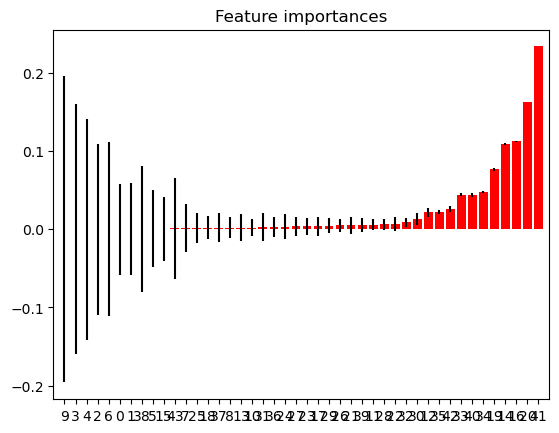

In [46]:
importances_rf = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
indices_rf = np.argsort(importances_rf)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_rf[f], importances_rf[indices[f]]))
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances_rf[indices], color="r", yerr=std[indices_rf], align="center")
plt.xticks(range(x_train.shape[1]), indices_rf)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [47]:
# Model 4: Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42,max_depth=4)   
gb_model.fit(x_train,z_train)

C:\Users\rsaga\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=4, random_state=42)

In [48]:
zgb_predict = gb_model.predict(x_test)
accuracy_score(z_test,zgb_predict) # Accuracy

0.7590682196339434

In [49]:
print(confusion_matrix(z_test, zgb_predict))
print(classification_report(z_test, zgb_predict))

[[6695  105]
 [2067  148]]
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      6800
           1       0.58      0.07      0.12      2215

    accuracy                           0.76      9015
   macro avg       0.67      0.53      0.49      9015
weighted avg       0.72      0.76      0.68      9015



In [55]:
# Feature Importance
importances_gbc = gb_model.feature_importances_
indices_gbc = np.argsort(importances)
feat_dict2= {}
for col, val in sorted(zip(x_train.columns, gb_model.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict2[col]=val
feat_df2 = pd.DataFrame({'Feature':feat_dict2.keys(),'Importance':feat_dict2.values()})
feat_df2

,Feature,Importance
0,Building_Value,2.603118e-01
1,Land_Value,1.985981e-01
2,Sold_As_Vacant_Yes,1.107184e-01
3,Finished_Area,1.088758e-01
4,Acreage,8.960166e-02
5,Neighborhood,7.726702e-02
6,Full_Bath,2.414811e-02
7,Land_Use_SINGLE FAMILY,2.290634e-02
8,Bedrooms,1.962644e-02
9,Multiple_Parcels_Involved_in_Sale_Yes,1.437920e-02
